# 201700949 설재혁

# 2번

In [150]:
import torch

In [151]:
# Pytorch
x = torch.tensor(2.0, requires_grad = True)
y = x**3 + x
z = y**2
z.backward()
print(x.grad)
print('x가 3.0일 때 z을 x로 미분한 값은 {}'.format(x.grad))

tensor(260.)
x가 3.0일 때 z을 x로 미분한 값은 260.0


In [152]:
x = torch.tensor(3.0, requires_grad = True)
y = x**3 + x
z = y**2
z.backward()
print(x.grad)
print('x가 3.0일 때 z을 x로 미분한 값은 {}'.format(x.grad))

tensor(1680.)
x가 3.0일 때 z을 x로 미분한 값은 1680.0


# 3번

In [153]:
import numpy
# 시그모이드 함수 expit() 사용을 위해 scipy.special 불러오기
import scipy.special
# 행렬을 시각화 하기 위한 라이브러리
import matplotlib.pyplot
# 시각화가 외부 윈도우가 아닌 현재의 노트북 내에서 보이도록 설정
%matplotlib inline

In [154]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes1, hiddennodes2, outputnodes, learningrate):
        # 입력, 은닉, 출력 계층의 노드 개수 설정
        self.innodes = inputnodes
        self.hnodes1 = hiddennodes1
        self.hnodes2 = hiddennodes2
        self.onodes = outputnodes
        
        # 가중치 행령 wih와 who
        # 배열 내 가중치는 w_i_j로 표기, 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
        # w11 w21
        # w12 w22 등
        self.wih = numpy.random.normal(0.0, pow(self.hnodes1, -0.5), (self.hnodes1, self.innodes))
        self.whh = numpy.random.normal(0.0, pow(self.hnodes2, -0.5), (self.hnodes2, self.hnodes1))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes2))
        
        # 학습률
        self.lr = learningrate
        
        # 활성화 함수로 ReLU함수를 이용
        self.activation_function = lambda x: numpy.maximum(x,0)
        
        pass
    
    
    # 신경망 학습시키기
    def train(self, input_list, targets_list):
        # 입력 리스트를 2차원의 행렬로 변환
        inputs = numpy.array(input_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # 은닉 계층1으로 들어오는 신호를 계산
        hidden_inputs1 = numpy.dot(self.wih, inputs)
        # 은닉 계층1에서 나가는 신호를 계산
        hidden_outputs1 = self.activation_function(hidden_inputs1)
        
        # 은닉 계층2으로 들어오는 신호를 계산
        hidden_inputs2 = numpy.dot(self.whh, hidden_outputs1)
        # 은닉 계층2에서 나가는 신호를 계산
        hidden_outputs2 = self.activation_function(hidden_inputs2)
        
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = numpy.dot(self.who, hidden_outputs2)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        # 출력 계층의 오차는 (실제 값 - 계산 값)
        output_errors = targets - final_outputs
        
        # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
        hidden_errors1 = numpy.dot(self.who.T, output_errors)
        hidden_errors2 = numpy.dot(self.whh.T, hidden_errors1)
        
        # 은닉 계층2과 출력 계층 간의 가중치 업데이트
        self.who += self.lr * numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs2))
        
        # 은닉 계층1과 은닉 계층2 간의 가중치 업데이트
        self.whh += self.lr * numpy.dot((hidden_errors2*hidden_outputs2*(1.0-hidden_outputs2)), numpy.transpose(hidden_outputs1))
        
        # 입력 계층과 은닉 계층1 간의 가중치 업데이트
        self.wih += self.lr * numpy.dot((hidden_errors1*hidden_outputs1*(1.0-hidden_outputs1)), numpy.transpose(inputs))
        
        pass
    
    # 신경망에 질의하기
    def query(self, inputs_list):
        # 입력 리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # 은닉 계층1으로 들어오는 신호를 계산
        hidden_inputs1 = numpy.dot(self.wih, inputs)
        # 은닉 계층1에서 나가는 신호를 계산
        hidden_outputs1 = self.activation_function(hidden_inputs1)
        
        # 은닉 계층2으로 들어오는 신호를 계산
        hidden_inputs2 = numpy.dot(self.whh, hidden_outputs1)
        # 은닉 계층2에서 나가는 신호를 계산
        hidden_outputs2 = self.activation_function(hidden_inputs2)
        
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = numpy.dot(self.who, hidden_outputs2)
        # 최종 출력 계층에서 들어오는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [155]:
# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes1 = 200
hidden_nodes2 = 200
output_nodes = 10

# 학습률
learning_rate = 0.01

# 신경망의 인스턴스를 생성
n = neuralNetwork(input_nodes, hidden_nodes1, hidden_nodes2, output_nodes, learning_rate)

In [156]:
# Fashion mnist 학습 데이터인 csv 파일 리스트로 불러오기
training_data_file = open('fashion-mnist_train.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [157]:
# 신경망 학습시키기

# 주기(epoch)란 학습 데이터가 학습을 위해 사용되는 횟수를 의미
epoch = 5

for e in range(epoch):
    # 학습 데이터 모음 내의 모든 레코드 탐색
    for record in training_data_list:
        # 레코드를 쉼표에 의해 분리
        all_values = record.split(',')
        # 입력 값의 범위와 값 조정
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0]은 이 레코드에 대한 결과 값
        targets[int(all_values[0])] = 0.99
        n.train(inputs,targets)
        pass
    pass

<ipython-input-154-aa4b655fa94a>:55: RuntimeWarning: overflow encountered in multiply
  self.who += self.lr * numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs2))
<ipython-input-154-aa4b655fa94a>:58: RuntimeWarning: overflow encountered in multiply
  self.whh += self.lr * numpy.dot((hidden_errors2*hidden_outputs2*(1.0-hidden_outputs2)), numpy.transpose(hidden_outputs1))


In [158]:
# Fashion mnist 테스트 데이터의 csv 파일을 리스트로 불러오기
test_data_file = open('fashion-mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [159]:
# 신경망 테스트하기

# 신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

# 테스트 데이터 모음 내에서 모든 레코드 탐색
for record in test_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    # 정답은 첫 번째 값
    correct_label = int(all_values[0])
    # 입력 값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = numpy.argmax(outputs)
    # 정답 또는 오답을 리스트에 추가
    if(label == correct_label):
        # 정답인 경우 성적표에 1을 더함
        scorecard.append(1)
    else:
        # 정답이 아닌 경우 성적표에 0을 더함
        scorecard.append(0)
        pass
    pass

In [160]:
# 정답의 비율인 성적을 계산해 출력
scorecard_array = numpy.asarray(scorecard)
print(f'epochs = {epoch}')
print(f'hidden_nodes1 = {hidden_nodes1}')
print(f'hidden_nodes2 = {hidden_nodes2}')
print(f'learning_rate = {learning_rate}')
print(f'performance = {scorecard_array.sum()/scorecard_array.size}')
print('201700949 설재혁')

epochs = 5
hidden_nodes1 = 200
hidden_nodes2 = 200
learning_rate = 0.01
performance = 0.1
201700949 설재혁


# 4번

공부 시간: 2, 실제 점수: 81, 예측 점수: 82
공부 시간: 4, 실제 점수: 93, 예측 점수: 88
공부 시간: 6, 실제 점수: 91, 예측 점수: 94
공부 시간: 8, 실제 점수: 97, 예측 점수: 100
공부 시간: 10, 실제 점수: 99, 예측 점수: 106
공부 시간: 12, 실제 점수: 100, 예측 점수: 112
rmse 최종 값: 6.284902544988268


Text(0.5, 0, 'Predict Score')

Text(0, 0.5, 'Actual Score')

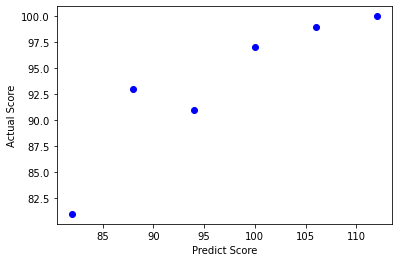

In [161]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 기울기 a와 y절편 b
wb = [3,76]

# x,y의 데이터 값
data = [[2,81], [4,93], [6,91], [8,97], [10,99], [12,100]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# y = ax + b에 a,b값을 대입하여 결과를 출력하는 함수
def predict(x):
    return wb[0]*x + wb[1]

# RMSE 함수
def rmse(a,p):
    return np.sqrt(((a-p) ** 2).mean())

# RMSE 함수를 각 y값에 대입하여 최종 값을 구하는 함수
def rmse_val(predict_result, y):
    return rmse(np.array(predict_result), np.array(y))

# 예측 값이 들어 있는 빈 리스트
predict_result = []
# 
actual_list = []

# 모든 x 값을 한 번씩 대입하여 predict_result 환성
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    actual_list.append(y[i])
    print('공부 시간: %.f, 실제 점수: %.f, 예측 점수: %.f' % (x[i], y[i], predict(x[i])))

# 최종 RMSE 출력
print('rmse 최종 값: ' + str(rmse_val(y, predict_result)))

plt.scatter(predict_result, actual_list, c="blue")
plt.xlabel('Predict Score')
plt.ylabel('Actual Score')
plt.show()